# Proyecto Machine Learning 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

### Análisis exploratorio de los datos

In [2]:
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape
df.info()
df['y'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

In [5]:
X = df.drop(columns='y')
y = df['y'].map({'yes' : 1, 'no' : 0})

In [6]:
y.value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [7]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [9]:
num_cols, cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome'],
       dtype='object'))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

## Modelos

### Decision Tree

In [12]:
dt_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
y_pred = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       801
           1       0.40      0.48      0.44       104

    accuracy                           0.86       905
   macro avg       0.67      0.69      0.68       905
weighted avg       0.87      0.86      0.86       905



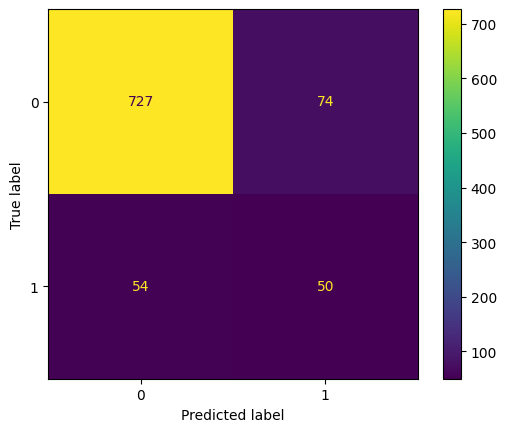

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Probamos una poda al árbol para evitar overfitting

In [15]:
dt_pruned = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=50,
        random_state=42
    ))
])

dt_pruned.fit(X_train, y_train)

y_pred_dt_pruned = dt_pruned.predict(X_test)
print(classification_report(y_test, y_pred_dt_pruned))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.54      0.36      0.43       104

    accuracy                           0.89       905
   macro avg       0.73      0.66      0.68       905
weighted avg       0.88      0.89      0.88       905



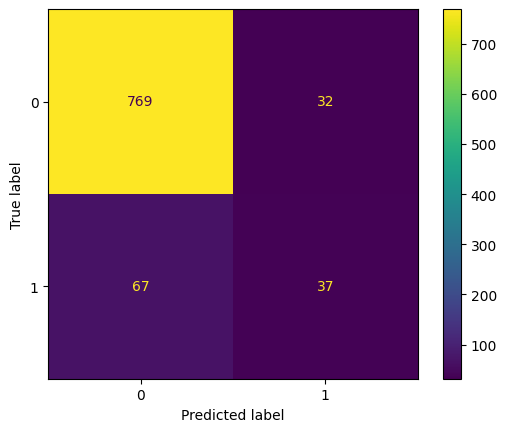

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_pruned)

Las métricas mejoran levemente pero no llegamos a los resultados esperados. Por lo tanto, pasamos a otro modelo.

### KNN

In [17]:
knn_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       801
           1       0.49      0.18      0.27       104

    accuracy                           0.88       905
   macro avg       0.69      0.58      0.60       905
weighted avg       0.85      0.88      0.86       905



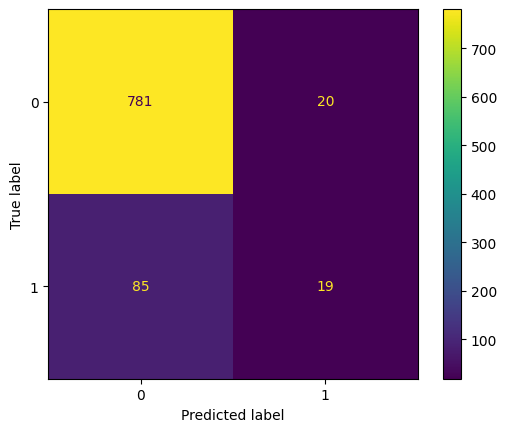

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

Ahora probamos variar los vecinos:

In [19]:
neighbors = [1, 3, 5, 8, 10, 15]

for k in neighbors:
    knn_pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=k))
    ])

    knn_pipeline.fit(X_train, y_train)

    y_pred_knn = knn_pipeline.predict(X_test)
    precision = precision_score(y_test, y_pred_knn, pos_label=1)
    recall = recall_score(y_test, y_pred_knn, pos_label=1)
    f1 = f1_score(y_test, y_pred_knn, pos_label=1)

    print(f'k : {k}')
    print(f' Precision(1)={precision:.3f} | Recall(1)={recall:.3f} | F1(1)={f1:.3f}')
    

k : 1
 Precision(1)=0.440 | Recall(1)=0.356 | F1(1)=0.394
k : 3
 Precision(1)=0.510 | Recall(1)=0.240 | F1(1)=0.327
k : 5
 Precision(1)=0.487 | Recall(1)=0.183 | F1(1)=0.266
k : 8
 Precision(1)=0.647 | Recall(1)=0.106 | F1(1)=0.182
k : 10
 Precision(1)=0.550 | Recall(1)=0.106 | F1(1)=0.177
k : 15
 Precision(1)=0.522 | Recall(1)=0.115 | F1(1)=0.189


Luego de variar el número de vecinos, se observa que los resultados obenidos no mejoran. Por lo tanto, pasamos a otro modelo

### Random Forest

In [20]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       801
           1       0.47      0.52      0.49       104

    accuracy                           0.88       905
   macro avg       0.70      0.72      0.71       905
weighted avg       0.88      0.88      0.88       905



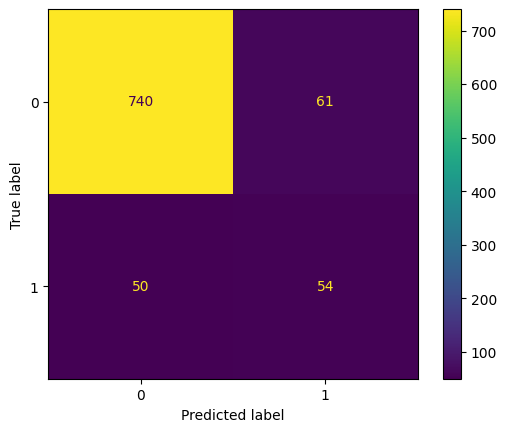

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

Vamos a variar un poco los parámetros a ver si obtenemos mejoras.

In [22]:
maxD = [6,8,10,12,15]

for md in maxD:
    rf_pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=200,
            max_depth=md,
            min_samples_split = 10,
            min_samples_leaf = 5,
            max_features = 'sqrt', #cuantas variables mira cada split
            class_weight='balanced',
            random_state=42,
            n_jobs = -1 #Para que use todos los nucleos del CPU (más rápido)
        ))
    ])

    rf_pipeline.fit(X_train, y_train)

    y_pred_rf = rf_pipeline.predict(X_test)

    precision = precision_score(y_test, y_pred_rf, pos_label=1)
    recall = recall_score(y_test, y_pred_rf, pos_label=1)
    f1 = f1_score(y_test, y_pred_rf, pos_label=1)

    print(f'k : {md}')
    print(f' Precision(1)={precision:.3f} | Recall(1)={recall:.3f} | F1(1)={f1:.3f}')

k : 6
 Precision(1)=0.387 | Recall(1)=0.788 | F1(1)=0.519
k : 8
 Precision(1)=0.433 | Recall(1)=0.779 | F1(1)=0.557
k : 10
 Precision(1)=0.452 | Recall(1)=0.731 | F1(1)=0.559
k : 12
 Precision(1)=0.452 | Recall(1)=0.673 | F1(1)=0.541
k : 15
 Precision(1)=0.462 | Recall(1)=0.644 | F1(1)=0.538


Observamos una gran mejora en la métrica de recall. 

### Neural Network

In [23]:
mlp_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', MLPClassifier(
        hidden_layer_sizes=(50, 25),
        max_iter=500,
        early_stopping=True,
        random_state=42
    ))
])

mlp_pipeline.fit(X_train, y_train)

y_pred_mlp = mlp_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.51      0.34      0.41       104

    accuracy                           0.89       905
   macro avg       0.72      0.65      0.67       905
weighted avg       0.87      0.89      0.88       905



No se obtienen buenos resultados. Vamos a jugar un poco más con la red

### Deep Neural Network

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision

In [25]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)


X_train_proc.dtype

dtype('float64')

In [26]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_proc.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision')]
)

c:\Users\Sebastian\Desktop\ProyectoML\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5
)

In [28]:
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))

In [29]:
history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6501 - loss: 0.6125 - precision: 0.2085 - recall: 0.7038 - val_accuracy: 0.8881 - val_loss: 0.4924 - val_precision: 0.4737 - val_recall: 0.5921 - learning_rate: 0.0010
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.5046 - precision: 0.3047 - recall: 0.8006 - val_accuracy: 0.8785 - val_loss: 0.3789 - val_precision: 0.4483 - val_recall: 0.6842 - learning_rate: 0.0010
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4642 - precision: 0.3341 - recall: 0.8240 - val_accuracy: 0.8412 - val_loss: 0.3594 - val_precision: 0.3709 - val_recall: 0.7368 - learning_rate: 0.0010
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.4114 - precision: 0.3555 - recall: 0.8475 - val_accuracy: 0.8273 - val_loss: 0.3520 - val_precision: 0.3497 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.806

In [30]:
y_pred_prob = model.predict(X_test_proc)
y_pred = (y_pred_prob >= 0.5).astype(int)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       801
           1       0.38      0.81      0.51       104

    accuracy                           0.82       905
   macro avg       0.67      0.82      0.70       905
weighted avg       0.90      0.82      0.85       905



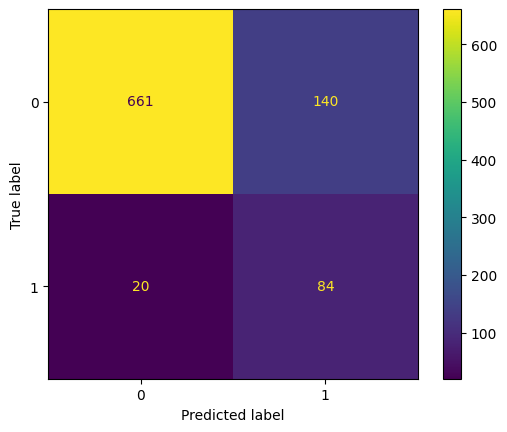

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Se obtienen buenos resultados, parecidos a los del random forest.

* A continuación se observa como evolucionó la perdida en entrenamiento y validación a lo largo del entrenamiento.

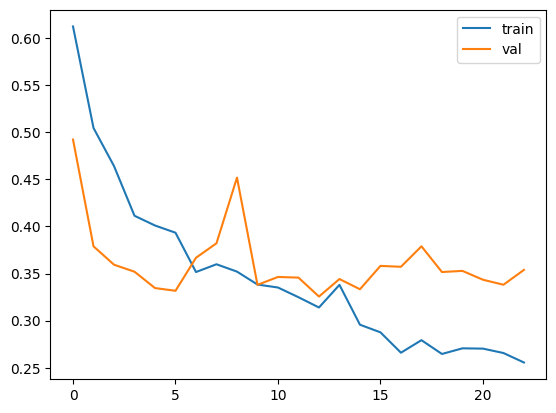

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

**Primera Conclusión**

Luego de entrenar distintos modelos se observa que los que ofrecieron mejores resultados son Random Forest y Deep Neural Network. A continuación vamos a llevar a cabo un proceso de cross-validation para estos modelos.

### Cross-Validation

Creamos los folds estratificados.

In [34]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [ ]:
rf_precision = []
rf_recall = []
dnn_precision = []
dnn_recall = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    X_train_proc = preprocessor.fit_transform(X_train)
    X_val_proc = preprocessor.transform(X_val)  

    threshold = 0.5

    #random_forest

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=6,
        min_samples_split = 10,
        min_samples_leaf = 5,
        max_features = 'sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train_proc, y_train)


    y_prob_rf = rf.predict_proba(X_val_proc)[:, 1]
    y_pred_rf = (y_prob_rf >= threshold).astype(int)
    precision_rf = precision_score(y_val, y_pred_rf, pos_label=1)
    recall_rf = recall_score(y_val, y_pred_rf, pos_label=1)

    rf_precision.append(precision_rf)
    rf_recall.append(recall_rf)
    #DNN
    
    model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_proc.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', Recall(name='recall'), Precision(name='precision')]
    )

    classes = np.unique(y_train)
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=classes,
        y=y_train
    )

    class_weight_dict = dict(zip(classes, class_weights))

    history = model.fit(
        X_train_proc, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        callbacks=[early_stop, reduce_lr],
        verbose=0,
        random_state = 42
    )

    y_pred_prob = model.predict(X_val_proc)
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred, pos_label=1)
    recall = recall_score(y_val, y_pred, pos_label=1)

    dnn_precision.append(precision)
    dnn_recall.append(recall)


Fold 1


c:\Users\Sebastian\Desktop\ProyectoML\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Fold 2


c:\Users\Sebastian\Desktop\ProyectoML\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Fold 3


c:\Users\Sebastian\Desktop\ProyectoML\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Fold 4


c:\Users\Sebastian\Desktop\ProyectoML\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Fold 5


c:\Users\Sebastian\Desktop\ProyectoML\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Vamos a armar una tabla para visualizar los datos

In [39]:
results = pd.DataFrame({
    'Modelo': ['Random Forest', 'DNN'],
    
    'Precision (mean)': [
        np.mean(rf_precision),
        np.mean(dnn_precision)
    ],
    'Precision (std)': [
        np.std(rf_precision),
        np.std(dnn_precision)
    ],
    
    'Recall (mean)': [
        np.mean(rf_recall),
        np.mean(dnn_recall)
    ],
    'Recall (std)': [
        np.std(rf_recall),
        np.std(dnn_recall)
    ]
})

results

,Modelo,Precision (mean),Precision (std),Recall (mean),Recall (std)
0,Random Forest,0.388686,0.019594,0.771758,0.048095
1,DNN,0.378248,0.056659,0.699048,0.137308


Tras evaluar ambos modelos mediante validación cruzada estratificada y utilizando precision y recall para la clase 1, se observa que el Random Forest presenta un mejor desempeño general que la red neuronal.

Con un umbral de decisión de 0.5, el Random Forest logra un mayor recall promedio (0.77) manteniendo una precision similar a la DNN, además de mostrar una variabilidad considerablemente menor entre folds.

La DNN, si bien competitiva, presenta una mayor inestabilidad y no logra superar al Random Forest, por lo que no se justifica su mayor complejidad para este problema.

**Conclusión final:**

De los modelos evaluados el que mostró un mayor rendimiento fue el basado en un Random Forest. Lo sigue de cerca el modelo de DNN pero la complejidad que este modelo implica no mejora los resultados.